Importing Libraries

In [1]:
#Import necessary libraries..

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset

data = pd.read_csv('ratings_Electronics (1).csv',names=['UserId','ProductId','Rating','Timestamp'])

In [3]:
#Preview and check the basic information

data.head()

,UserId,ProductId,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


Data Cleaning

In [4]:
#Checking how much data
data.shape

(7824482, 4)

In [5]:
#Checking the null value in data
data.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [6]:

data.dtypes

UserId        object
ProductId     object
Rating       float64
Timestamp      int64
dtype: object

Data Processing

In [7]:
#Make a variable in which store the rating

rating = data['Rating']
rating

0          5.0
1          5.0
2          1.0
3          3.0
4          1.0
          ... 
7824477    5.0
7824478    5.0
7824479    4.0
7824480    4.0
7824481    5.0
Name: Rating, Length: 7824482, dtype: float64

In [8]:
# Create sentiment column from rating
def get_sentiment(rating):  
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [9]:
data['Sentiment'] = data['Rating'].apply(get_sentiment)

In [10]:
data[['Sentiment','Rating']].head()

,Sentiment,Rating
0,Positive,5.0
1,Positive,5.0
2,Negative,1.0
3,Neutral,3.0
4,Negative,1.0


In [11]:
#View Sentiment Distribution

print("\nSentiment counts:")
data['Sentiment'].value_counts()


Sentiment counts:


Sentiment
Positive    5833322
Negative    1358087
Neutral      633073
Name: count, dtype: int64

In [12]:
#Proportion 
print("\nSentiment proportions (%):")
sentiment_counts = data['Sentiment'].value_counts(normalize=True) * 100
sentiment_counts


Sentiment proportions (%):


Sentiment
Positive    74.552181
Negative    17.356893
Neutral      8.090925
Name: proportion, dtype: float64

In [13]:
#Average Rating per Sentiment

print("\nAverage rating by sentiment:")
data.groupby('Sentiment')['Rating'].mean()


Average rating by sentiment:


Sentiment
Negative    1.336004
Neutral     3.000000
Positive    4.745294
Name: Rating, dtype: float64

Data Visualization

In [14]:
sentiment_colors = {'Positive': '#2ecc71', 'Neutral': '#f1c40f', 'Negative': '#e74c3c'}


C:\Users\gaura\AppData\Local\Temp\ipykernel_7836\3033106585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gaura\AppData\Local\Temp\ipykernel_7836\3033106585.py:14: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\gaura\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


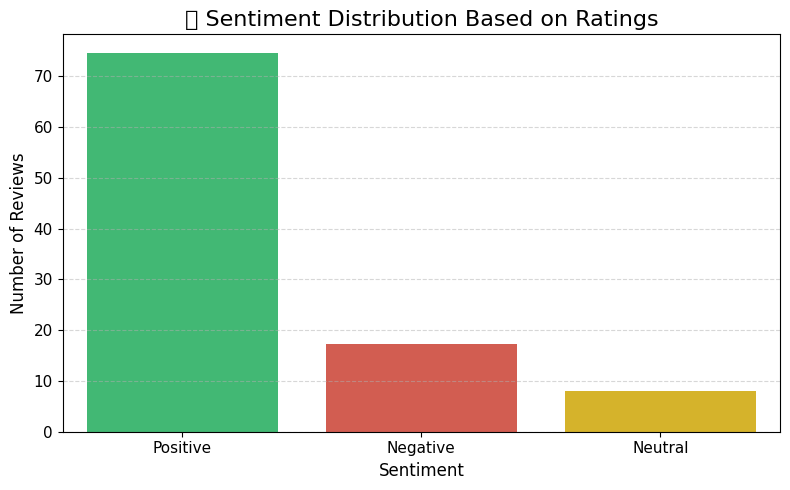

In [15]:
# --- Bar Chart ---
plt.figure(figsize=(8, 5))
sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    palette=[sentiment_colors[label] for label in sentiment_counts.index]
)
plt.title('🟢 Sentiment Distribution Based on Ratings', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



C:\Users\gaura\AppData\Local\Temp\ipykernel_7836\3057996663.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\gaura\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


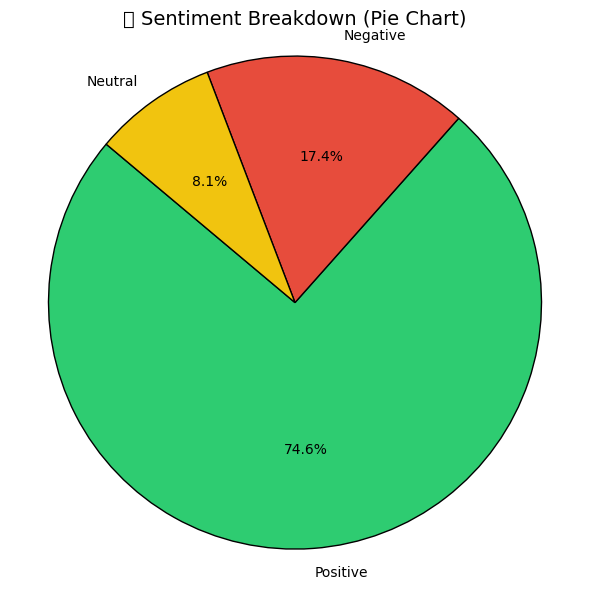

In [16]:
# --- Pie Chart ---
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=[sentiment_colors[label] for label in sentiment_counts.index],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('📊 Sentiment Breakdown (Pie Chart)', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_7836\2948371710.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


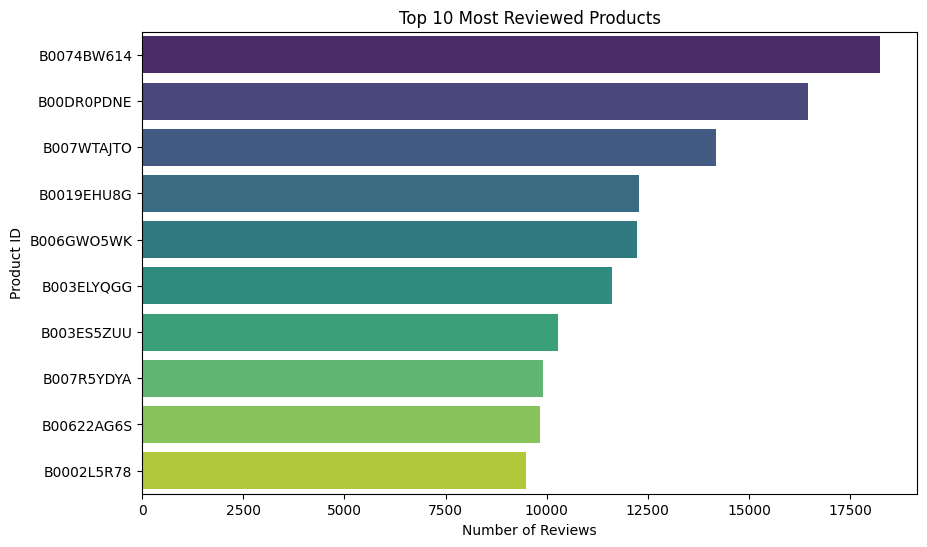

In [17]:
#Bar chart of Top 10 Most Reviewed Products

top_products = data['ProductId'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product ID')
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_7836\1137353263.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette='mako')


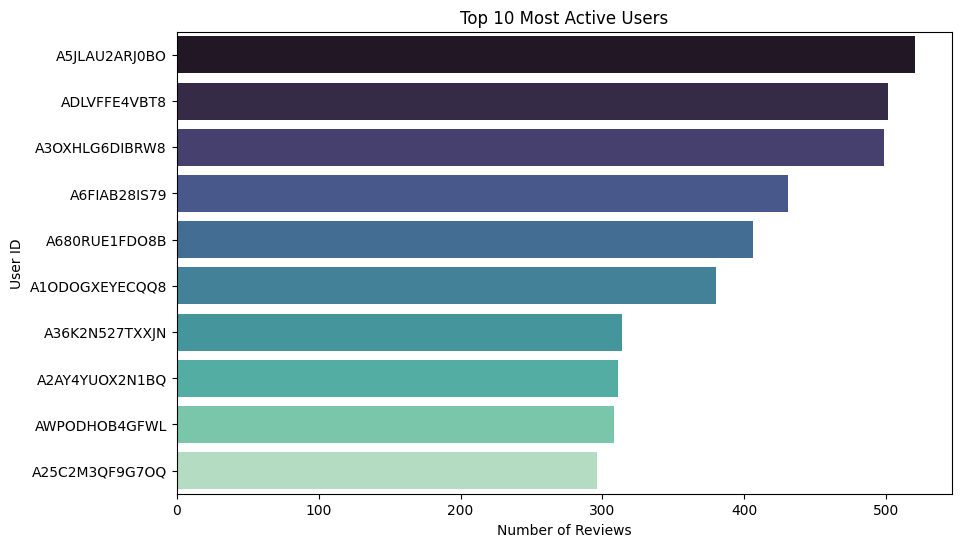

In [18]:
#Bar chart of Top 10 Most Active User

top_users = data['UserId'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_users.values, y=top_users.index, palette='mako')
plt.title('Top 10 Most Active Users')
plt.xlabel('Number of Reviews')
plt.ylabel('User ID')
plt.show()

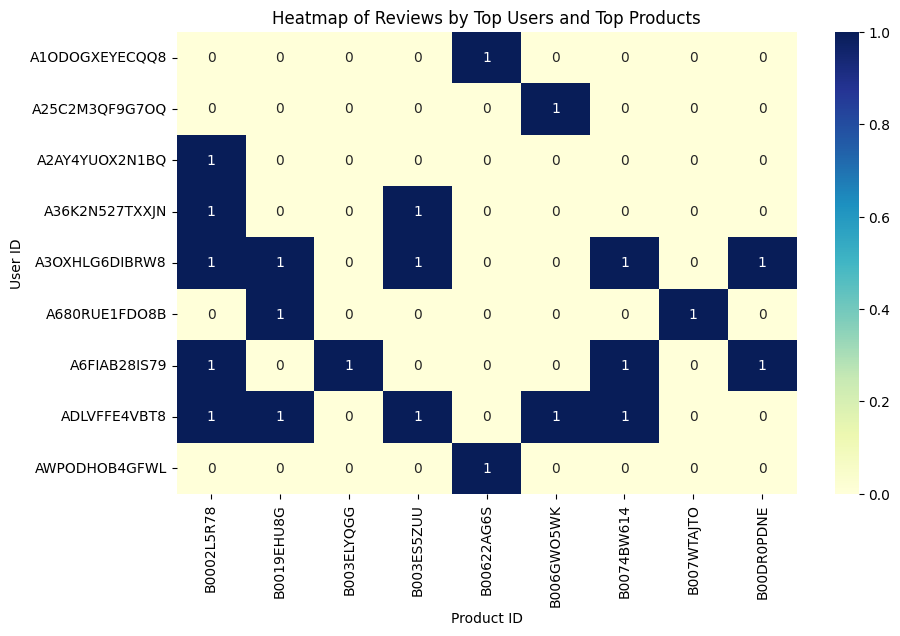

In [19]:
# Selecting top 10 users and top 10 products
top_users = data['UserId'].value_counts().nlargest(10).index
top_products = data['ProductId'].value_counts().nlargest(10).index

filtered_df = data[data['UserId'].isin(top_users) & data['ProductId'].isin(top_products)]
heatmap_data = filtered_df.groupby(['UserId', 'ProductId']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Heatmap of Reviews by Top Users and Top Products')
plt.xlabel('Product ID')
plt.ylabel('User ID')
plt.show()